# Titanic: Machine Learning from Disaster

## 1 Import libraries

In [37]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt

## 2 Load data

In [7]:
df = pd.read_csv("../Data/Titanic/train.csv")

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We find the attributes including *'Age'*, *'Cabin'*, *'Embarked'* have NAN

### Data Dictionary

|**Variable**	|**Definition**	|**Key**|
|:---------------:|:---------------:|:-------:|
|survival	    |Survival	    |0 = No, 1 = Yes    |
|pclass	        |Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex|	|
|Age	|Age in years	||
|sibsp	|# of siblings / spouses aboard the Titanic	||
|parch	|# of parents / children aboard the Titanic	||
|ticket	|Ticket number	||
|fare	|Passenger fare	||
|cabin	|Cabin number	||
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

+ **pclass:** A proxy for socio-economic status (SES)

    1st = Upper

    2nd = Middle

    3rd = Lower

+ **age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

+ **sibsp:** The dataset defines family relations in this way...

    *Sibling* = brother, sister, stepbrother, stepsister
    
    *Spouse* = husband, wife (mistresses and fiancés were ignored)

+ **parch:** The dataset defines family relations in this way...

    *Parent* = mother, father

    *Child* = daughter, son, stepdaughter, stepson

+ **Some children travelled only with a nanny, therefore parch=0 for them.**

## 3 Exploratory Data Analysis

### 3.1 Sex distribution between survivor and dead people

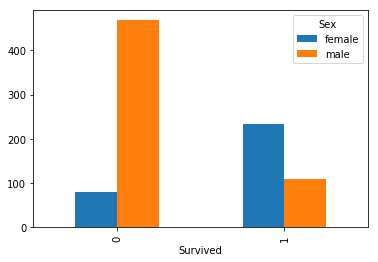

In [16]:
%matplotlib inline
grouped_sex = df.groupby(['Survived','Sex'])['PassengerId'].size().unstack()
grouped_sex.plot(kind='bar')

In [17]:
grouped_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


We can get four statisitic information:
1. 14.75% of dead people are female, but 85.25% are male;
2. 68.13% of survivors are female, but 31.87% are male.
3. 74.20% of female people are survived;
4. 18.89% of male people are survied.

So **SEX** is an important feature.

### 3.2 Pclass distribution

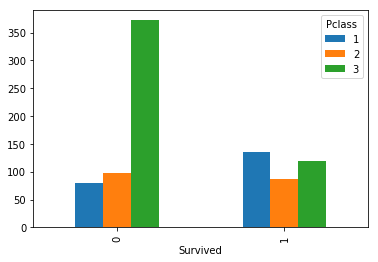

In [18]:
grouped_pclass = df.groupby(['Survived','Pclass'])['PassengerId'].size().unstack()
grouped_pclass.plot(kind='bar')

In [19]:
grouped_pclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


So **Pclass** is an important feature.

### 3.3 The first letter of passenger's name distribution --Just for fun

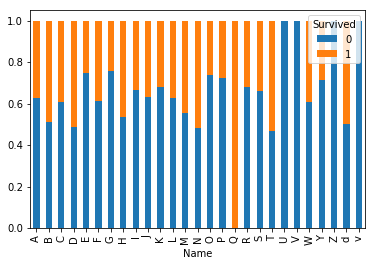

In [61]:
f = lambda x: x[0]
first_letter = df.Name.map(f)
cnt_first = df.groupby(first_letter).size()
df_first = DataFrame(cnt_first, columns=['Total'])
grouped_first = df.groupby([first_letter, 'Survived']).size().unstack().fillna(0)
# grouped_merge = pd.merge(grouped_first, df_first, left_index = True, right_index=True)
# grouped_merge
#grouped_first
grouped_first.div(grouped_first.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

From the picture above, we can find the first letter have influence on the survived situation approximately. But It's because the dataset is small and bias probably. **We can't consider the feature by our intuition **

### 3.4 Age distribution

In [65]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [78]:
df_tmp = df[df.Age.notnull()]
labels = pd.cut(df_tmp.Age, 10)
pd.crosstab(df_tmp.Survived, labels, margins=True)

Age,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]","(40.21, 48.168]","(48.168, 56.126]","(56.126, 64.084]","(64.084, 72.042]","(72.042, 80]",All
Survived,,,,,,,,,,,
0,18,27,114,104,66,46,24,15,9,1,424
1,36,19,63,65,52,24,21,9,0,1,290
All,54,46,177,169,118,70,45,24,9,2,714


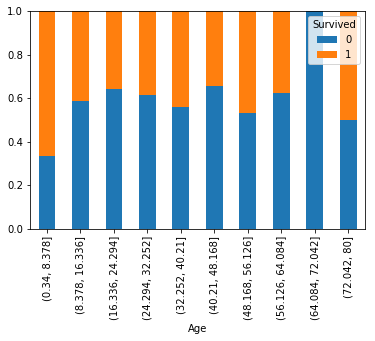

In [81]:
grouped_label = df_tmp.groupby(['Survived', labels]).size().unstack(0).fillna(0)
grouped_label.div(grouped_label.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ylim=[0,1])